# ***EDA: Estadísticas de los jugadores de la NBA 2022-2023***

<div style="text-align: center;">
  <img src="nba.jpeg" alt="Texto alternativo" width="auto" height="400">
</div>

### **1.Librerías**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max.column',None)

### **2.Carga de datos**

In [3]:
df = pd.read_csv('../data/raw/NBA.csv',encoding='latin1', sep=";")

### **3.Primera exploración**

**3.1.Primera visualización del DataFrame**

In [4]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [5]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5
678,539,Ivica Zubac,C,25,LAC,76,76,28.6,4.3,6.8,0.634,0.0,0.0,0.000,4.3,6.7,0.637,0.634,2.2,3.1,0.697,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8


**3.2.Estructura del DataFrame**

In [6]:
df.shape

(679, 30)

**3.3.Clasificación de variables y revisión de valores faltantes**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      679 non-null    int64  
 1   Player  679 non-null    object 
 2   Pos     679 non-null    object 
 3   Age     679 non-null    int64  
 4   Tm      679 non-null    object 
 5   G       679 non-null    int64  
 6   GS      679 non-null    int64  
 7   MP      679 non-null    float64
 8   FG      679 non-null    float64
 9   FGA     679 non-null    float64
 10  FG%     679 non-null    float64
 11  3P      679 non-null    float64
 12  3PA     679 non-null    float64
 13  3P%     679 non-null    float64
 14  2P      679 non-null    float64
 15  2PA     679 non-null    float64
 16  2P%     679 non-null    float64
 17  eFG%    679 non-null    float64
 18  FT      679 non-null    float64
 19  FTA     679 non-null    float64
 20  FT%     679 non-null    float64
 21  ORB     679 non-null    float64
 22  DR

**3.4.Revisión de duplicados**

In [8]:
df.duplicated().sum()

0

**3.5.Descripción general de los datos**

En esta primera exploración observamos los siguiente:

* El conjunto de datos contiene 679 entradas (jugadores) y diversas variables como edad, juegos jugados, minutos por juego, tiros de campo, porcentajes, rebotes, asistencias, robos, bloqueos, pérdidas, faltas personales y puntos por juego.

* Nuestro DataFrame tiene 679 observaciones y 30 columnas. De las 30 variables que contiene, 3 son cualitativas, Player, Pos y Tm y el resto son cuantitativas. No tenemos valores duplicados. 

* Valores faltantes: No hay valores faltantes en ninguna de las columnas, lo que indica que el conjunto de datos está completo.

### **4.Estudio de las variables**

**4.1.Explicación de las variables**

A continuación vamos a dar una breve explicación sobre cada variable.

In [9]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Descripción de las variables:

* Rk: Rango. Posición relativa de un jugador en comparación con otros jugadores.Forma de evaluar y comparar su desempeño en relación con otros.

* Player : Nombre del jugador.

* Pos: Posición.

* Age: Edad del jugador.

* Tm: Equipo.

* G: Partidos disputados.

* GS: Partidos iniciados. Titularidades.

* MP: Minutos jugados por partido.

* FG : Canastas por partido.

* FGA : Intentos de canastas por partido.

* FG%: Porcentaje de canastas.

* 3P: Triples por partido.

* 3PA: Intentos de triples por partido.

* 3P%: Porcentaje de triples.

* 2P: Canastas de de 2 puntos por partido.

* 2PA: Intentos de canastas de 2 puntos por partido.

* 2P%: Porcentaje de canastas de 2 puntos

* eFG%: Porcentaje Efectivo de Tiros de Campo. Se calcula de la siguiente manera:

        EFg% = (Canastas + 0.5 * Triples Anotados) / Intentos de Canastas

* FT : Tiros libres por partido.

* FTA: Intentos de tiros libres por partido.

* FT%: Porcentaje de tiros libres.

* ORB: Rebotes ofensivos por partido.

* DRB: Rebotes defensivos por partido.

* TRB: Rebotes totales por partido.

* AST: Asistencias por partido.

* STL: Robos por partido.

* BLK: Tapones por partido.

* TOV: Pérdidas de balón por partido.

* PF : Faltas personales por partido.

* PTS: Puntos por partido.

**4.2.Renombramiento de columnas**

Renombraremos nuestras columnas para facilitar la comprensión al trabajar y guardaremos el DataFrame.

In [10]:
df.rename(columns={'Rk':'Rango', 'Player':'NombreJugador', 'Pos':'Posicion', 'Age':'Edad', 'Tm':'Equipo', 'G':'PartidosDisputados', 'GS':'Titularidades',
       'MP':'MinJugados/Partido', 'FG':'Canastas/Partido', 'FGA':'IntentosCanastas/Partido', 'FG%':'Canastas%', '3P':'Triples/Partido', '3PA':'IntentosTriples/Partido', '3P%':'Triples%', '2P':'Canastas2ptos/partido', '2PA':'IntentosCanastas2ptos/partido',
       '2P%':'Canastas2ptos%', 'eFG%':'EfectivoTiros%', 'FT':'TirosLibres/partido', 'FTA':'IntentosTirosLibres/Partido', 'FT%':'TirosLibres%', 'ORB':'RebotesOfensivos/partidos', 'DRB':'RebotesDefensivos/partido', 'TRB':'RebotesTotales/Partido', 'AST':'Asistencias/partido',
       'STL':'Robos/Partido', 'BLK':'Tapones/Partido', 'TOV':'Perdidas/partido','PF':'Faltas/partido','PTS':'Puntos/partido'}, inplace=True)

df.to_csv('../data/process/df_renombrado.csv', index=False)

In [11]:
df = pd.read_csv('../data/process/df_renombrado.csv')
df.columns

Index(['Rango', 'NombreJugador', 'Posicion', 'Edad', 'Equipo',
       'PartidosDisputados', 'Titularidades', 'MinJugados/Partido',
       'Canastas/Partido', 'IntentosCanastas/Partido', 'Canastas%',
       'Triples/Partido', 'IntentosTriples/Partido', 'Triples%',
       'Canastas2ptos/partido', 'IntentosCanastas2ptos/partido',
       'Canastas2ptos%', 'EfectivoTiros%', 'TirosLibres/partido',
       'IntentosTirosLibres/Partido', 'TirosLibres%',
       'RebotesOfensivos/partidos', 'RebotesDefensivos/partido',
       'RebotesTotales/Partido', 'Asistencias/partido', 'Robos/Partido',
       'Tapones/Partido', 'Perdidas/partido', 'Faltas/partido',
       'Puntos/partido'],
      dtype='object')

**4.3.Cardinalidad**

Haremos un estudio sobre la cardinalidad, para observar el número de valores únicos de cada variable
y ver si encontramos algo significativo para nuestro estudio.

In [12]:
cardinalidad = pd.DataFrame({
    'Columna': df.columns,
    'Tipo_Variable':['Discreta' if x == 'int64' else 'Continua' if x=='float64' else 'Nominal' for x in df.dtypes],
    'Cardinalidad%':[round((df[col].nunique())/len(df)*100,2) for col in df.columns]})

cardinalidad


,Columna,Tipo_Variable,Cardinalidad%
0,Rango,Discreta,79.38
1,NombreJugador,Nominal,79.38
2,Posicion,Nominal,1.18
3,Edad,Discreta,3.24
4,Equipo,Nominal,4.57
5,PartidosDisputados,Discreta,12.22
6,Titularidades,Discreta,11.78
7,MinJugados/Partido,Continua,45.36
8,Canastas/Partido,Continua,14.87
9,IntentosCanastas/Partido,Continua,25.63


No observamos nada reseñable en la cardinalidad, la cardinalidad del jugador no es del 100% dado que hay jugadores que jugaron en diferentes equipos durante la misma temporada, lo estudiaremos más adelante.

## **Hipótesis**

### **Limpieza y preparacion de los datos**

-Seleccion de variables determinando la importancia respecto a mis hipótesis

-Atípicos

-Falsos

### **5.Análisis**

-Univariante

-Bivariante

-Multivariante

+ **Estudio Previo**
Resumen estadistico general del dataframe 

In [13]:
#Resumen Estadístico
df.describe().round(2)

,Rango,Edad,PartidosDisputados,Titularidades,MinJugados/Partido,Canastas/Partido,IntentosCanastas/Partido,Canastas%,Triples/Partido,IntentosTriples/Partido,Triples%,Canastas2ptos/partido,IntentosCanastas2ptos/partido,Canastas2ptos%,EfectivoTiros%,TirosLibres/partido,IntentosTirosLibres/Partido,TirosLibres%,RebotesOfensivos/partidos,RebotesDefensivos/partido,RebotesTotales/Partido,Asistencias/partido,Robos/Partido,Tapones/Partido,Perdidas/partido,Faltas/partido,Puntos/partido
count,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00
mean,265.98,26.03,43.34,20.07,19.46,3.25,6.92,0.46,1.00,2.78,0.32,2.25,4.14,0.53,0.53,1.37,1.77,0.71,0.84,2.62,3.46,2.01,0.60,0.37,1.07,1.66,8.86
std,154.96,4.33,24.73,25.77,9.42,2.36,4.80,0.12,0.86,2.21,0.14,1.91,3.38,0.15,0.11,1.48,1.79,0.22,0.73,1.72,2.28,1.89,0.39,0.37,0.80,0.77,6.63
min,1.00,19.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,132.50,23.00,22.00,0.00,12.15,1.50,3.40,0.42,0.30,1.00,0.29,0.90,1.70,0.48,0.50,0.40,0.60,0.67,0.30,1.40,1.80,0.80,0.30,0.10,0.50,1.20,4.10
50%,264.00,25.00,45.00,6.00,18.80,2.60,5.70,0.45,0.80,2.40,0.35,1.60,3.10,0.54,0.54,0.90,1.20,0.76,0.70,2.30,3.00,1.30,0.50,0.30,0.90,1.60,6.90
75%,399.50,29.00,65.50,36.50,27.55,4.20,9.20,0.50,1.50,4.15,0.39,3.00,5.55,0.59,0.58,1.70,2.30,0.84,1.10,3.40,4.50,2.70,0.80,0.50,1.40,2.20,11.55
max,539.00,42.00,83.00,83.00,41.00,11.20,22.20,1.00,4.90,11.40,1.00,10.50,17.80,1.00,1.00,10.00,12.30,1.00,5.10,9.60,12.50,10.70,3.00,3.00,4.10,5.00,33.10


In [14]:
df.describe(include="object")

,NombreJugador,Posicion,Equipo
count,679,679,679
unique,539,8,31
top,Dorian Finney-Smith,SG,TOT
freq,3,168,70


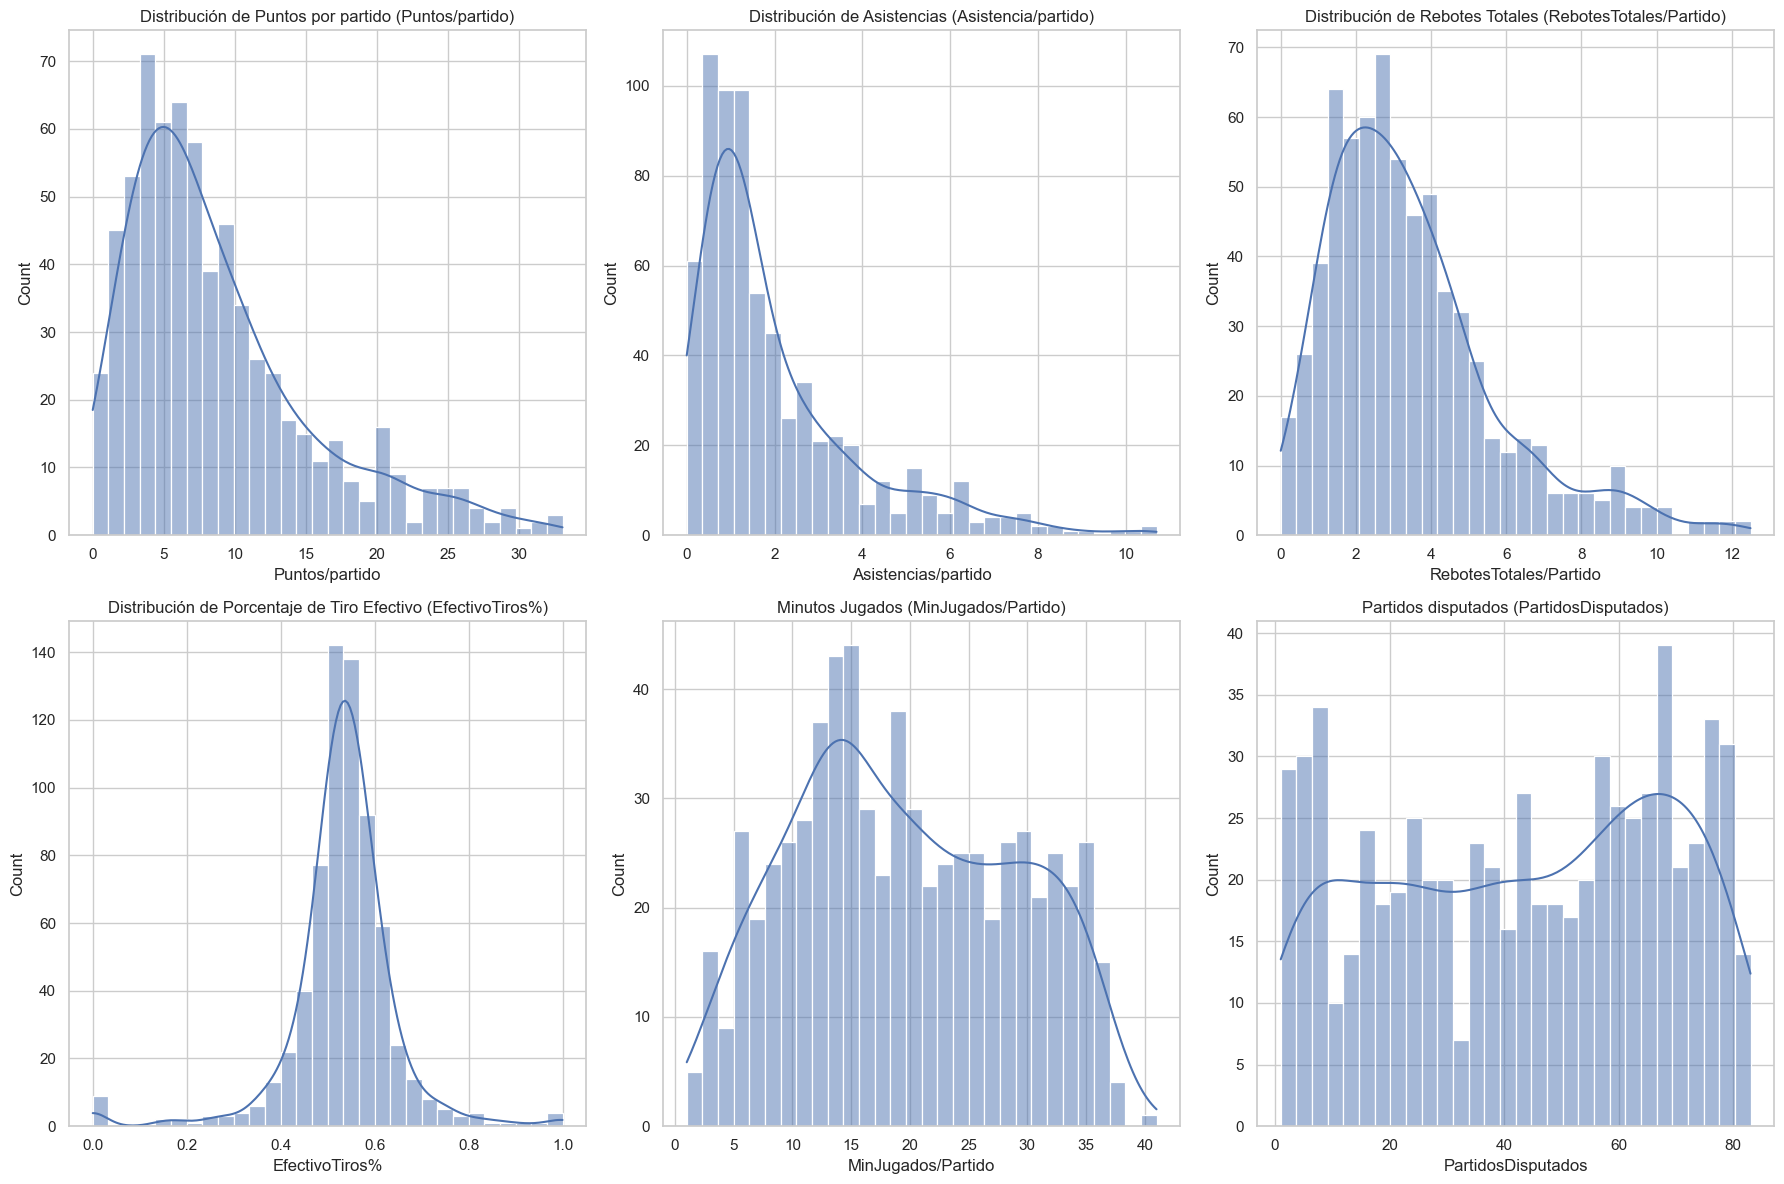

In [16]:
# Configuración de estilos para los gráficos
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribución de Puntos por Juego (PTS)
sns.histplot(df['Puntos/partido'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de Puntos por partido (Puntos/partido)')

# Distribución de Asistencias (AST)
sns.histplot(df['Asistencias/partido'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de Asistencias (Asistencia/partido)')

# Distribución de Rebotes Totales (TRB)
sns.histplot(df['RebotesTotales/Partido'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribución de Rebotes Totales (RebotesTotales/Partido)')

# Distribución de Porcentaje de Tiro Efectivo (eFG%)
sns.histplot(df['EfectivoTiros%'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribución de Porcentaje de Tiro Efectivo (EfectivoTiros%)')

# Distribución de Eficiencia (EFF)
sns.histplot(df['MinJugados/Partido'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Minutos Jugados (MinJugados/Partido)')

# Distribución de Eficiencia (EFF)
sns.histplot(df['PartidosDisputados'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Partidos disputados (PartidosDisputados)')

plt.tight_layout()
plt.show()

Los gráficos de distribución proporcionan una visión general de cómo se distribuyen varias estadísticas clave entre los jugadores de la NBA:

* Puntos por Juego (PTS): La mayoría de los jugadores anotan menos de 20 puntos por juego, con una concentración en el rango bajo.
* Asistencias (AST): Similar a los puntos, la mayoría de los jugadores tienen un número bajo de asistencias por juego, con una distribución sesgada hacia la derecha.
* Rebotes Totales (TRB): La distribución de rebotes totales muestra un patrón similar, con la mayoría de los jugadores capturando un número moderado de rebotes por juego.
* Porcentaje de Tiro Efectivo (eFG%): La distribución de eFG% muestra una curva más simétrica, con la mayoría de los jugadores teniendo un porcentaje alrededor del 45% al 55%.
* Eficiencia (EFF): La eficiencia tiene una distribución que se inclina hacia valores más bajos, con una cola más larga hacia valores más altos.
* Los minutos jugados parece aproximarse a una distribución normal, donde la mayoría de los jugadores tienen una cantidad de minutos jugados que se encuentra alrededor del valor más frecuente (que sería la moda de la distribución).
El punto más alto del histograma está alrededor de los 20 a 25 minutos, sugiriendo que esa es la cantidad de minutos más comúnmente jugados por los jugadores.
La distribución muestra una cola hacia la derecha, indicando que hay jugadores que han jugado muchos más minutos que el promedio. La cola a la izquierda es menos pronunciada, lo que indica que hay menos jugadores que juegan muy pocos minutos.
* La distribución de los juegos jugados no es simétrica y parece estar sesgada hacia la derecha, indicando que hay más jugadores que han participado en un número menor de juegos.
Hay varios picos, lo que podría indicar una distribución multimodal. Esto puede suceder si hay subgrupos dentro de la población de jugadores que tienden a jugar un número característico de juegos. Por ejemplo, algunos jugadores pueden ser constantemente seleccionados para jugar casi todos los juegos, mientras que otros pueden participar solo ocasionalmente.
Existe una cola larga hacia la derecha que muestra que algunos jugadores han participado en muchos más juegos que la mayoría. La cola hacia la izquierda es mínima, lo que sugiere que casi todos los jugadores han participado en algunos juegos.

+ **Exploración de jugadores**



In [82]:
 
most_games = df[['Player', 'G']].sort_values(by='G', ascending=False).head(10)
most_games

KeyError: "None of [Index(['Player', 'G'], dtype='object')] are in the [columns]"

Análisis del mejor jugador 


In [ ]:
print(df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [ ]:
mikal = df[df['Player'] == 'Mikal Bridges']
mikal

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
77,58,Mikal Bridges,SF,26,TOT,83,83,35.7,7.1,15.3,0.468,2.0,5.3,0.382,5.1,9.9,0.514,0.535,3.8,4.3,0.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1
78,58,Mikal Bridges,SF,26,PHO,56,56,36.4,6.3,13.6,0.463,1.8,4.7,0.387,4.5,9.0,0.503,0.529,2.8,3.1,0.897,1.0,3.3,4.3,3.6,1.2,0.8,1.4,2.1,17.2
79,58,Mikal Bridges,SF,26,BRK,27,27,34.2,8.9,18.6,0.475,2.5,6.7,0.376,6.3,11.9,0.531,0.543,5.9,6.6,0.894,0.9,3.6,4.5,2.7,1.0,0.6,1.8,1.6,26.1


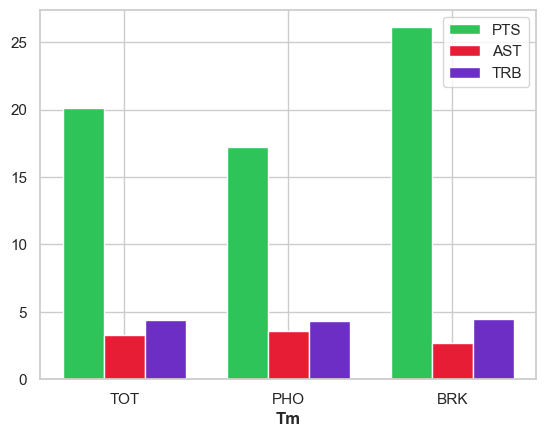

In [ ]:
bar_width = 0.25

r1 = np.arange(len(mikal['PTS']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, mikal['PTS'], color='#2ec459', width=bar_width, edgecolor='white', label='PTS')
plt.bar(r2, mikal['AST'], color='#e71d36', width=bar_width, edgecolor='white', label='AST')
plt.bar(r3, mikal['TRB'], color='#6c2ec4', width=bar_width, edgecolor='white', label='TRB')

plt.xlabel('Tm', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(mikal['G']))], mikal['Tm'])

plt.legend()
plt.show()



Análisis de Correlación 

In [95]:
import seaborn as sns

# Generar nuevamente el mapa de calor para visualizar las correlaciones entre las diferentes variables numéricas
correlation_matrix = df.corr()

# Configurando el tamaño del gráfico
plt.figure(figsize=(15, 15))

# Creando el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()


ValueError: could not convert string to float: 'Precious Achiuwa'

+ **METODOLOGÍA**

De lo anterior nos centramos en la "Eficiencia de Tiro" de los jugadores. Este es un aspecto crucial en el baloncesto, ya que una alta eficiencia de tiro suele ser indicativa de un buen rendimiento tanto a nivel individual como de equipo

Y proponemos la creación de una nueva variable llamada eficiencia global EFF, que contemplan variables que pueden describir este atributo fundamental. Su cinstrucción será: 

EFF=PTS+TRB+AST+STL+BLK−(FGA−FG)−(FTA−FT)−TOV

 Tiene en cuenta los puntos anotados, los rebotes, las asistencias, los robos y los bloqueos, y resta los intentos de tiro fallidos, los tiros libres fallidos y las pérdidas de balón. Es una medida integral que intenta capturar la contribución general de un jugador al juego.

. Basándonos en esto, postulamos una serie de hipótesis, a revisar en el análisis exploratorio: 

- 1. Existe una correlación positiva fuerte entre el porcentaje de tiro efectivo (eFG%) y los puntos anotados por juego (PTS) para los jugadores

- 2.  Varía significativamente el porcentaje de tiro efectivo (eFG%) entre las diferentes posiciones de los jugadores (C, PF, SF, SG, PG)

- 3.  Hay equipos que se destaquen por tener una mayor eficiencia de tiro promedio (eFG%) en comparación con otros
- 4. ¿Existen equipos cuyos jugadores tengan, en promedio, un mayor porcentaje de tiro efectivo (eFG%)? Esto podría indicar mejores estrategias de selección de tiros o habilidades de equipo en general. 

- 5.  Existe una relación entre la Eficiencia Global (EFF) y el tiempo de juego (Minutos por Juego - MP)


## Correlación entre la eficiencia de tiro (eFG%) y los puntos anotados por juego (PTS)

**Gráfico de dispersión para eFG% vs. PTS**

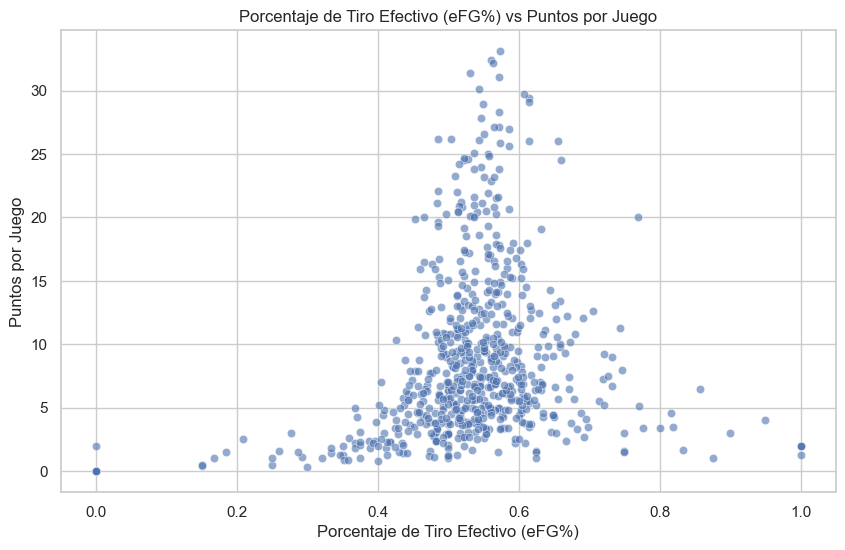

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='eFG%', y='PTS', alpha=0.6)
plt.title('Porcentaje de Tiro Efectivo (eFG%) vs Puntos por Juego')
plt.xlabel('Porcentaje de Tiro Efectivo (eFG%)')
plt.ylabel('Puntos por Juego')
plt.show()

El gráfico de dispersión muestra la relación entre el Porcentaje de Tiro Efectivo (eFG%) y los Puntos por Juego (PTS). Parece haber una tendencia positiva: a medida que el eFG% aumenta, también lo hacen los puntos por juego en general, lo que sugiere una correlación positiva entre estas dos métricas. Jugadores con un eFG% más alto tienden a anotar más puntos por juego.

## Impacto de la posición del jugador en la eficiencia de tiro (eFG%)

**Gráfico de caja para eFG% por posición**

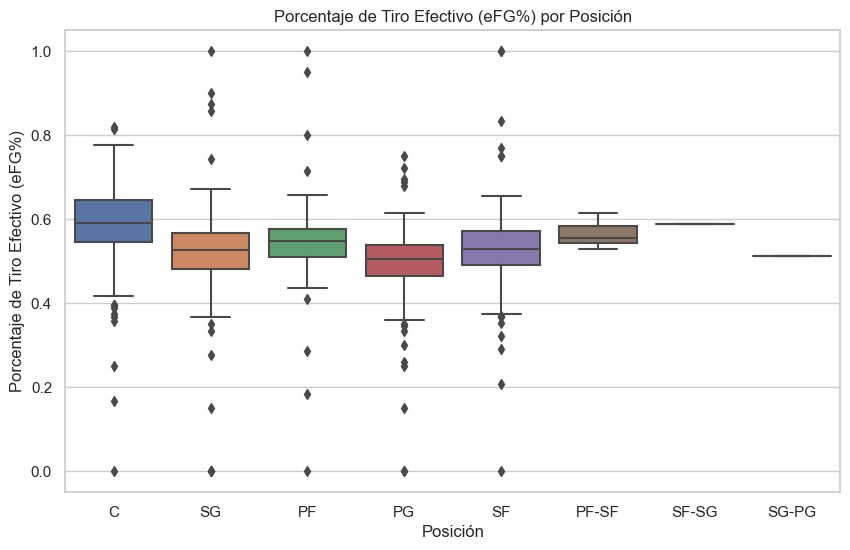

In [84]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pos', y='eFG%')
plt.title('Porcentaje de Tiro Efectivo (eFG%) por Posición')
plt.xlabel('Posición')
plt.ylabel('Porcentaje de Tiro Efectivo (eFG%)')
plt.show()

El gráfico de caja muestra la distribución del Porcentaje de Tiro Efectivo (eFG%) por posición de los jugadores. Podemos observar diferencias en la eficiencia de tiro entre las distintas posiciones:

* Las posiciones de Centro (C) y Ala-Pívot (PF) tienden a tener medianas de eFG% más altas, lo cual podría ser indicativo de que estos jugadores toman tiros más cercanos al aro, generalmente con una mayor probabilidad de acierto.

* Las posiciones de Guardia (SG, PG) y Alero (SF) muestran una mayor variabilidad en su eficiencia de tiro, con algunas excepciones de jugadores con eFG% muy alto.

## Comparación de la eficiencia de tiro entre equipos


In [87]:

# Calculando el eFG% promedio por equipo
team_efg_avg = df.groupby('Tm')['eFG%'].mean().sort_values()
team_efg_avg

Tm
BRK    0.478760
WAS    0.492217
HOU    0.502444
DET    0.505591
CHO    0.511526
SAS    0.517174
LAL    0.522917
MIA    0.523700
PHI    0.524190
POR    0.525167
SAC    0.525650
BOS    0.527944
PHO    0.528250
ATL    0.529050
IND    0.529300
MEM    0.531579
NOP    0.532882
UTA    0.535783
MIL    0.535810
TOT    0.537629
OKC    0.538211
NYK    0.540647
TOR    0.540900
LAC    0.542905
ORL    0.546300
DEN    0.549111
CHI    0.566056
CLE    0.567611
MIN    0.573250
GSW    0.573722
DAL    0.582826
Name: eFG%, dtype: float64

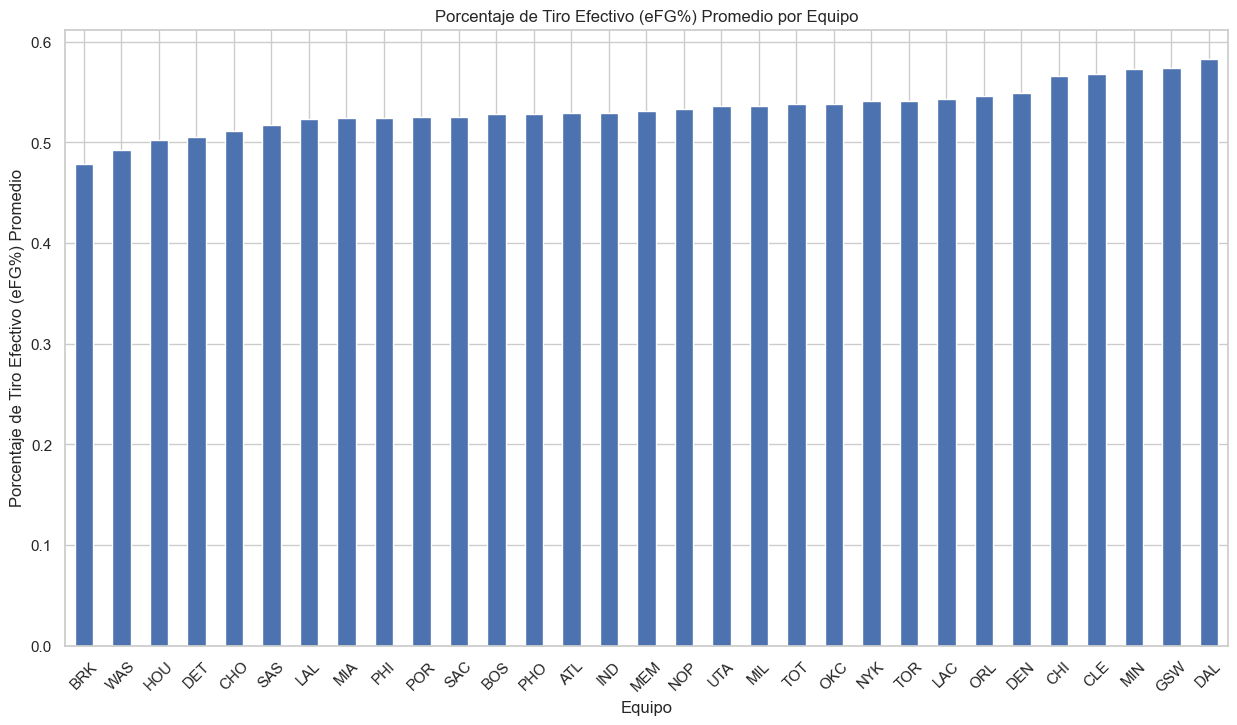

In [88]:
# Gráfico de barras para eFG% promedio por equipo
plt.figure(figsize=(15, 8))
team_efg_avg.plot(kind='bar')
plt.title('Porcentaje de Tiro Efectivo (eFG%) Promedio por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Tiro Efectivo (eFG%) Promedio')
plt.xticks(rotation=45)
plt.show()

El gráfico de barras muestra el Porcentaje de Tiro Efectivo (eFG%) promedio de cada equipo en la NBA para la temporada 2022-2023. Podemos observar una variación significativa entre los equipos en términos de eficiencia de tiro:

Algunos equipos destacan por tener un eFG% promedio notablemente alto, lo que sugiere una mayor eficiencia en la selección de tiros o en la habilidad de tiro de sus jugadores.
Por otro lado, hay equipos con un eFG% promedio más bajo, lo que podría indicar una selección de tiros menos eficiente o desafíos en la precisión del tiro.

Este análisis proporciona una visión interesante de cómo la eficiencia de tiro varía no solo entre jugadores individuales y posiciones, sino también a nivel de equipo, lo cual es crucial para las estrategias de juego y la evaluación del rendimiento del equipo.


## Eficiencia de tiro en función del equipo

Calcularemos el promedio del porcentaje de tiro efectivo (eFG%) por equipo y lo visualizaremos en un gráfico para ver qué equipos tienen en promedio una mayor eficiencia de tiro.

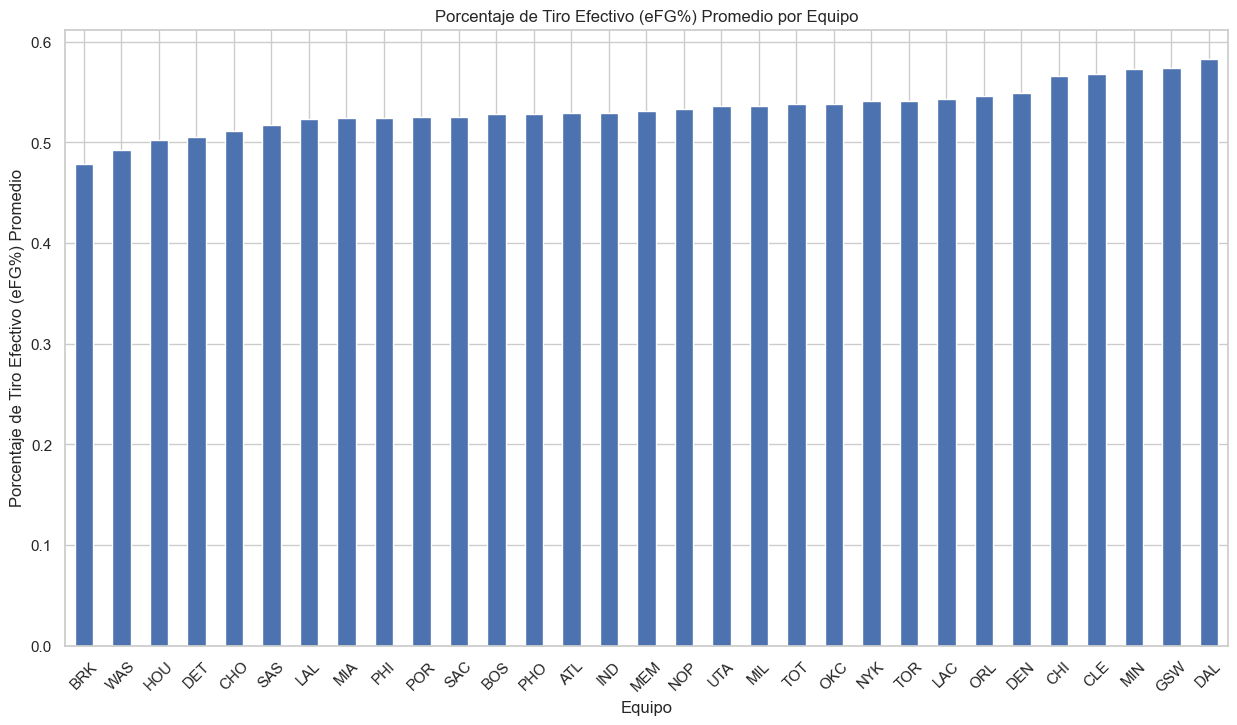

In [91]:
# Calculando el eFG% promedio por equipo
team_efg_avg = df.groupby('Tm')['eFG%'].mean().sort_values()

# Gráfico de barras para eFG% promedio por equipo
plt.figure(figsize=(15, 8))
team_efg_avg.plot(kind='bar')
plt.title('Porcentaje de Tiro Efectivo (eFG%) Promedio por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Tiro Efectivo (eFG%) Promedio')
plt.xticks(rotation=45)
plt.show()

El gráfico de barras muestra el Porcentaje de Tiro Efectivo (eFG%) promedio de cada equipo en la NBA para la temporada 2022-2023. Las diferencias en el eFG% promedio entre los equipos pueden sugerir variaciones en la eficiencia de tiro, posiblemente debido a estrategias de selección de tiros, habilidades individuales de los jugadores, o el estilo de juego del equipo.

Los equipos en el extremo superior del gráfico tienen un eFG% promedio más alto, lo que indica una mayor eficiencia en sus tiros. Por otro lado, los equipos en el extremo inferior tienen un eFG% promedio más bajo, lo que podría ser un área de mejora.

## Relación entre la Eficiencia Global (EFF) y el tiempo de juego (Minutos por Juego - MP)

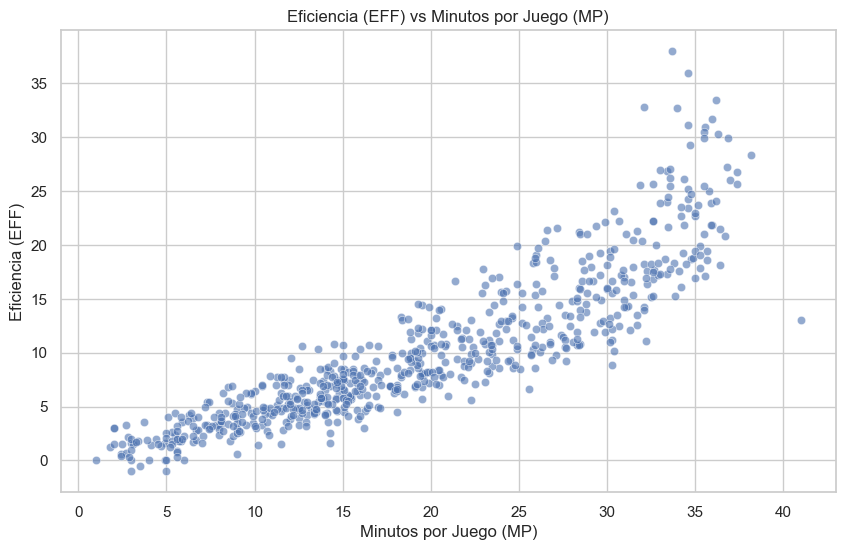

In [90]:
# Calculando la medida de eficiencia (EFF) para cada jugador
df['EFF'] = (df['PTS'] + df['TRB'] + df['AST'] + 
                   df['STL'] + df['BLK'] - 
                   (df['FGA'] - df['FG']) - 
                   (df['FTA'] - df['FT']) - 
                   df['TOV'])

# Relación entre la Eficiencia Global (EFF) y el tiempo de juego (Minutos por Juego - MP)

# Gráfico de dispersión para EFF vs. MP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MP', y='EFF', alpha=0.6)
plt.title('Eficiencia (EFF) vs Minutos por Juego (MP)')
plt.xlabel('Minutos por Juego (MP)')
plt.ylabel('Eficiencia (EFF)')
plt.show()


El gráfico de dispersión muestra la relación entre la Eficiencia (EFF) y los Minutos por Juego (MP). Observamos lo siguiente:

Existe una tendencia positiva, indicando que los jugadores con más minutos en la cancha tienden a tener una mayor eficiencia. Esto tiene sentido, ya que los jugadores que pasan más tiempo en juego suelen tener más oportunidades de contribuir positivamente en varios aspectos del juego.
Sin embargo, también hay una considerable variabilidad, especialmente en rangos medios de minutos jugados. Algunos jugadores con un tiempo de juego moderado muestran una alta eficiencia, lo que podría indicar un impacto significativo durante el tiempo que están en la cancha.
Esta medida de eficiencia proporciona una visión integral de la contribución de un jugador, combinando aspectos ofensivos y defensivos, así como la eficiencia en el tiro.

-Desarrollo hipótesis

-Conclusiones

### **10.Bibliografía**

* https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular/data